In [ ]:
# Import the necessary libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

1. Exploring the Dataset

In [ ]:
df = pd.read_csv('/content/Weather Data.csv')

In [ ]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
df.shape

(8784, 8)

In [ ]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

2. Data Preprocessing

In [ ]:
# Rename columns
df.columns = ['Datetime', 'Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]', 'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]', 'Weather']

# Convert time stamp column to time format
df.index = pd.to_datetime(df['Datetime']).dt.floor('T')
df = df.iloc[:, 1:]

# Remove empty rows (if any are present in the data).
df.drop(df[df.isnull().any(axis = 1)].index, inplace = True)

# Remove duplicates (if any are present in the dataset).
df.drop_duplicates(inplace = True)

# Separate 'Weather' column into three separate parts (each description of weather conditions in a separate column)
weather_split = ['Weather - p. 1', 'Weather - p. 2', 'Weather - p. 3']
df[weather_split] = df['Weather'].str.split(',', expand = True)

# Remove 'Weather' column (redundant).
df.drop(['Weather'], axis = 1, inplace = True)
# Storage of data on weather conditions according to zero-one coding.
weather_category_list = np.array([])

for column in df[weather_split]:
    weather_category_list = np.append(weather_category_list, df[weather_split][column].unique())

weather_category_list = weather_category_list[weather_category_list != None]
weather_category_list = np.unique(weather_category_list)

df[weather_category_list] = 0

for column in df[weather_split]:
    for index in df[weather_split].index:
        if df.loc[index, column] != None:
            df.at[index, df.loc[index, column]] = df.loc[index, df.loc[index, column]] + 1

# Delete 'Weather - p. 1', 'Weather - p. 2' and 'Weather - p. 3' columns (redundant)
df.drop(weather_split, axis = 1, inplace = True)

# Create an auxiliary set of column names in measured values
weather_measurement_data = ['Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]', 'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]']


In [ ]:
df.head()

,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Blowing Snow,Clear,Cloudy,Drizzle,...,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Set color scheme
color_1 = '#BFAF9D'
color_2 = '#C1C1D5'
color_3 = '#A16F86'
color_4 = sns.diverging_palette(h_neg = 32, h_pos = 32, s = 21, l = 68, as_cmap = True)

In [ ]:
for column in df[weather_measurement_data]:
    df['SMA168 ' + column] = df[column].rolling('168h', center = True).mean()

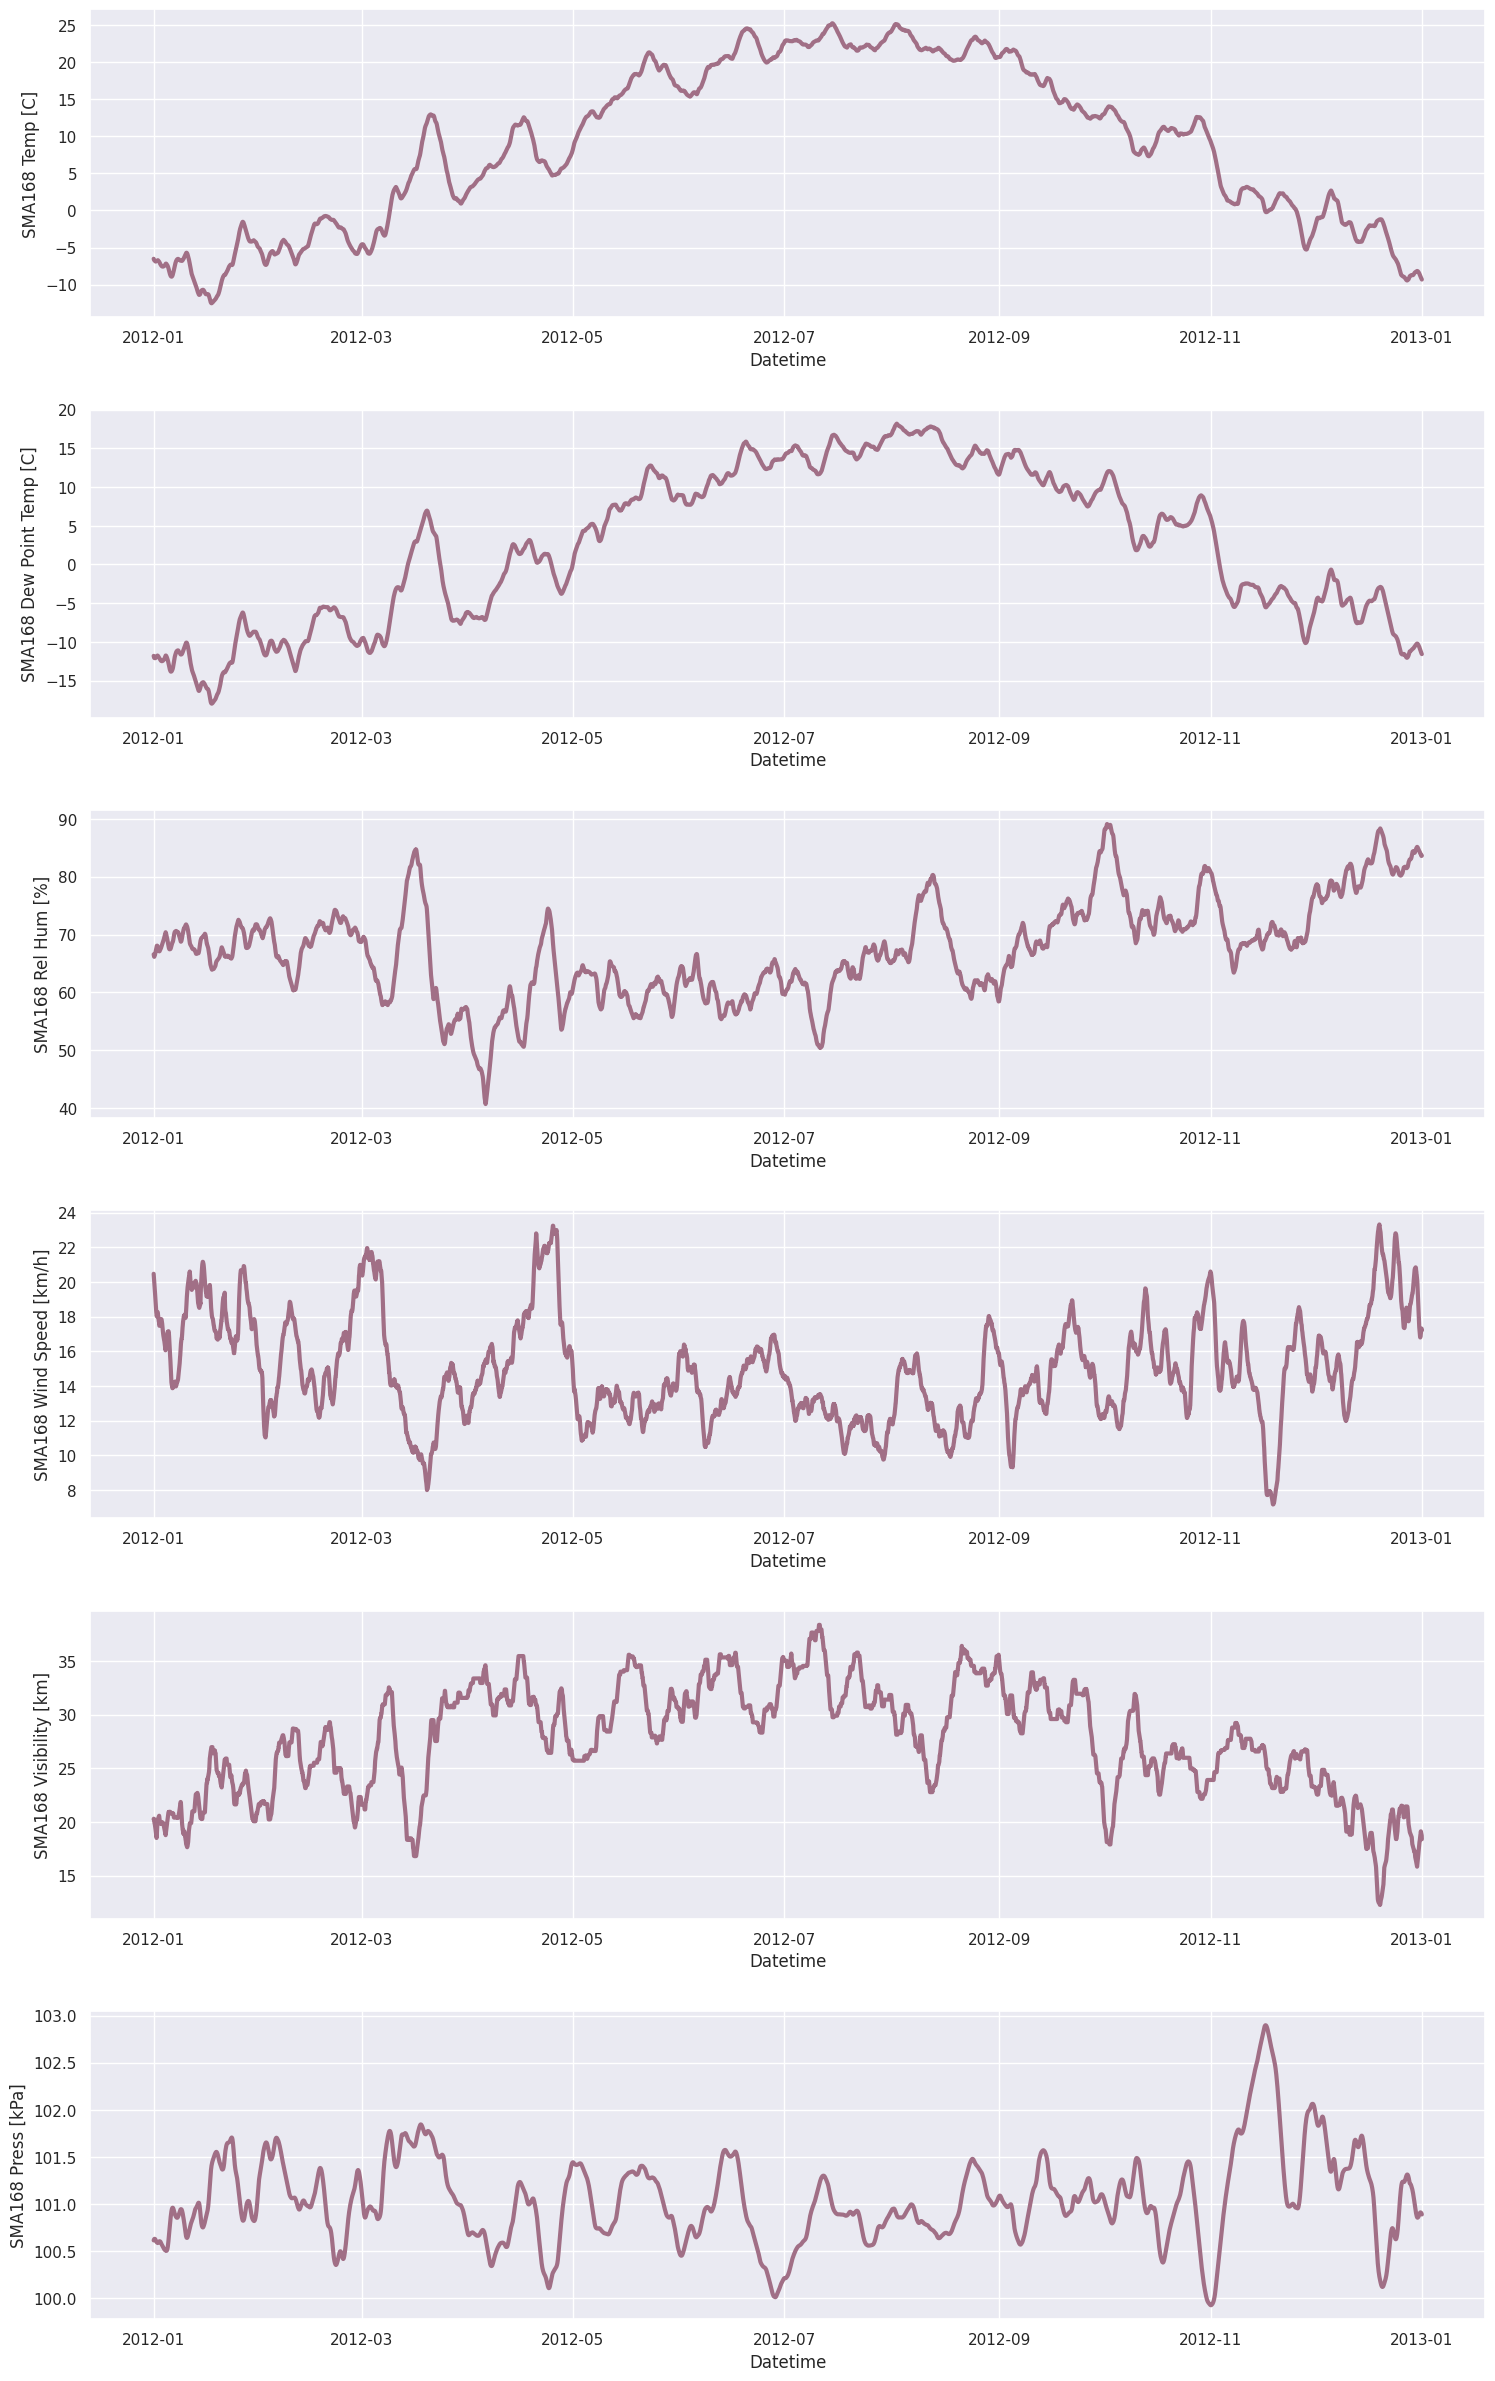

In [ ]:
# Display line graphs
plt.figure(figsize = (18, 30))

plt.subplot(611)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Temp [C]', color = color_3, lw = 3)

plt.subplot(612)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Dew Point Temp [C]', color = color_3, lw = 3)

plt.subplot(613)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Rel Hum [%]', color = color_3, lw = 3)

plt.subplot(614)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Wind Speed [km/h]', color = color_3, lw = 3)

plt.subplot(615)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Visibility [km]', color = color_3, lw = 3)

plt.subplot(616)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 Press [kPa]', color = color_3, lw = 3)

plt.subplots_adjust(hspace = 0.3)
plt.show()

3. Filtering Operations

In [ ]:
#number of days when Temp [C] was above 24

df[df['Temp [C]'] > 24].shape[0]


842

In [ ]:
#the number of rainy days

df[df['Rain'] == 1].shape[0]


454

4. Predicting Visibility Values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df['Datetime (month)'] = pd.to_datetime(df.index).month
df['Datetime (day)'] = pd.to_datetime(df.index).day
df['Datetime (hour)'] = pd.to_datetime(df.index).hour

param_ml_input = ['Datetime (month)', 'Datetime (day)', 'Datetime (hour)', 'Temp [C]', 'Rel Hum [%]', 'Press [kPa]', 'Fog', 'Rain', 'Clear']
param_ml_output = 'Visibility [km]'

In [ ]:
X_data = df[param_ml_input]
y_data = df[param_ml_output]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2)



In [ ]:
X_train.shape

(7027, 9)

In [ ]:
X_test.shape

(1757, 9)

In [ ]:
scaler =  StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter = 5000).fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)


In [ ]:


accuracy = np.mean(np.abs(y_pred - y_test) < 0.5)
print('Accuracy:', accuracy)


Accuracy: 0.08195788275469551


In [ ]:
#fine tune the model to improve accuracy

mlp = MLPRegressor(max_iter = 50000, hidden_layer_sizes=(100, 50)).fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)


accuracy = np.mean(np.abs(y_pred - y_test) < 0.5)
print('Accuracy:', accuracy)


Accuracy: 0.09163346613545817


In [ ]:
result = pd.DataFrame({'Actual value (y_test)': y_test,
                       'Value predicted by the model (y_pred)': y_pred,
                       'Difference': abs(y_pred - y_test)})
result.head()

,Actual value (y_test),Value predicted by the model (y_pred),Difference
Datetime,,,
2012-12-20 19:00:00,25.0,24.366136,0.633864
2012-03-09 15:00:00,48.3,33.175569,15.124431
2012-05-24 05:00:00,24.1,28.610214,4.510214
2012-05-01 06:00:00,9.7,7.220365,2.479635
2012-03-20 08:00:00,24.1,40.548194,16.448194


In [ ]:
# use the test set to make a prediction. Print the actual and predicted values

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Accuracy (R^2):', r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Accuracy (R^2): -0.09936143980985257
Root Mean Squared Error: 12.887908457357856
